Разведывательный анализ данных (EDA)

Цель проекта - Сформулировать предположения и гипотезы для  построения модели.
Проверить качество данных и очистить их.
Определиться с параметрами модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
# Получаем информацию о датафрейме
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Работа с числовыми признаками

In [3]:
# Переименуем столбец
stud.rename(columns={'studytime, granular': 'stgranular'}, inplace=True)

In [4]:
display(stud.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,stgranular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5]:
# Удаляем столбцы, которые не сильно влияют на итоговую оценку. Определяем экспертно.Вряд ли посещение детского сада 
# или причина выбора школы могут стать факторами оценки на экзамене.
stud.drop(['reason','Pstatus','guardian','nursery','traveltime','failures'],axis=1,inplace=True)

In [6]:
stud

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,studytime,schoolsup,famsup,paid,activities,stgranular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,4.0,4.0,at_home,teacher,2.0,yes,no,no,no,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,1.0,1.0,at_home,other,2.0,no,yes,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,1.0,1.0,at_home,other,2.0,yes,no,NaN,no,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,4.0,2.0,health,NaN,3.0,no,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,3.0,3.0,other,other,2.0,no,yes,yes,no,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,2.0,2.0,services,services,2.0,no,yes,yes,no,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,3.0,1.0,services,services,1.0,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,1.0,1.0,other,other,1.0,NaN,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,3.0,2.0,services,other,1.0,no,no,no,NaN,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [7]:
# Постчитаем пропущенные занчения для каждого из столбцов (ниже уже провели замену NaN для столбца score)
stud.isna().sum()

school         0
sex            0
age            0
address       17
famsize       27
Medu           3
Fedu          24
Mjob          19
Fjob          36
studytime      7
schoolsup      9
famsup        39
paid          40
activities    14
stgranular     7
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [8]:
# подсчитываем количество каждого значения по столбцу
stud['score'].value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [9]:
# Замена NaN (6 случаев) на значение 5-ого индекса, т.е. на 23
stud['score'].fillna(stud['score'].value_counts().index[5],inplace=True)

 Перед подсчётом статистик определим выбросы и удалим выбросы

In [10]:
stud.age.describe()
# Нет выбросов, т.к. рамки условия от 15 до 22 лет

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [11]:
stud.Medu.describe()
# Нет выбросов, т.к. по условиям от 0 до 4

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [12]:
stud.Fedu.describe()
# Есть выбросы

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [13]:
# Устраняем выбросы из столбца Fedu
stud=stud.loc[stud.Fedu<=4]

In [14]:
stud.studytime.describe()
# Нет выбросов, т.к. по условиям от 1 до 4.

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [15]:
stud[['stgranular']].describe()

,stgranular
count,363.000000
mean,-6.082645
std,2.521466
min,-12.000000
25%,-6.000000
50%,-6.000000
75%,-3.000000
max,-3.000000


In [16]:
stud=stud.loc[stud.stgranular>=-10.5]

In [17]:
stud.famrel.describe()
# Есть выбросы, т.к. по условиям от 1 до 5.

count    315.000000
mean       3.942857
std        0.922078
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [18]:
# Устраняем выбросы из столбца famrel
stud=stud.loc[stud.famrel>=1]

In [19]:
stud.freetime.describe()
# нет выбросов, т.к. по условиям от 1 до 5

count    307.000000
mean       3.250814
std        0.972980
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [20]:
stud.goout.describe()
# Нет выбросов, т.к. по условиям от 1 до 5

count    306.000000
mean       3.107843
std        1.103558
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [21]:
stud.health.describe()
# Нет выбросов, т.к. по условиям от 1 до 5

count    304.000000
mean       3.506579
std        1.390665
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [22]:
stud.absences.describe()
# Есть выбросы, в году 365 дней

count    304.000000
mean       7.578947
std       25.870336
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [23]:
# Устраняем выбросы из столбца absences
stud=stud.loc[stud.absences<=365]

In [24]:
stud.absences.describe()

count    303.000000
mean       6.333333
std       14.080343
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64

In [25]:
# Удаление пропущенных значений в столбце score
stud.dropna(subset=['score'])

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,studytime,schoolsup,famsup,paid,activities,stgranular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,4.0,4.0,at_home,teacher,2.0,yes,no,no,no,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,1.0,1.0,at_home,other,2.0,no,yes,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,1.0,1.0,at_home,other,2.0,yes,no,NaN,no,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,4.0,2.0,health,NaN,3.0,no,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,3.0,3.0,other,other,2.0,no,yes,yes,no,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,2.0,2.0,services,services,2.0,no,yes,yes,no,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,3.0,1.0,services,services,1.0,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,1.0,1.0,other,other,1.0,NaN,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,3.0,2.0,services,other,1.0,no,no,no,NaN,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [26]:
# Выводим матрицу корреляций для числовых признаков
stud.corr()

,age,Medu,Fedu,studytime,stgranular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.142432,-0.190641,0.049002,-0.049002,0.020554,0.004752,0.088303,-0.090462,0.207152,-0.153051
Medu,-0.142432,1.000000,0.673794,0.079939,-0.079939,0.003236,-0.021461,0.063057,-0.073325,0.039461,0.207879
Fedu,-0.190641,0.673794,1.000000,0.072713,-0.072713,-0.019511,-0.057780,-0.011197,0.008060,0.015553,0.145974
studytime,0.049002,0.079939,0.072713,1.000000,-1.000000,0.079086,-0.090901,-0.070385,-0.040736,-0.007636,0.068283
stgranular,-0.049002,-0.079939,-0.072713,-1.000000,1.000000,-0.079086,0.090901,0.070385,0.040736,0.007636,-0.068283
famrel,0.020554,0.003236,-0.019511,0.079086,-0.079086,1.000000,0.175499,0.096407,0.073015,0.035727,0.028062
freetime,0.004752,-0.021461,-0.057780,-0.090901,0.090901,0.175499,1.000000,0.239723,0.101443,0.071664,0.022231
goout,0.088303,0.063057,-0.011197,-0.070385,0.070385,0.096407,0.239723,1.000000,-0.009396,0.070902,-0.151797
health,-0.090462,-0.073325,0.008060,-0.040736,0.040736,0.073015,0.101443,-0.009396,1.000000,-0.013082,-0.022960
absences,0.207152,0.039461,0.015553,-0.007636,0.007636,0.035727,0.071664,0.070902,-0.013082,1.000000,0.019220


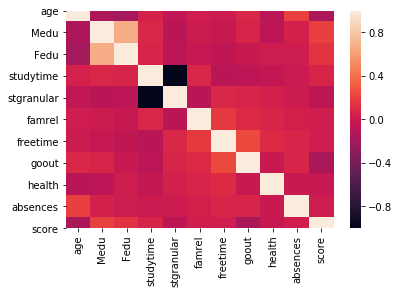

In [27]:
# Визуализируем корреляции для числовых признаков
sns.heatmap(stud.corr())

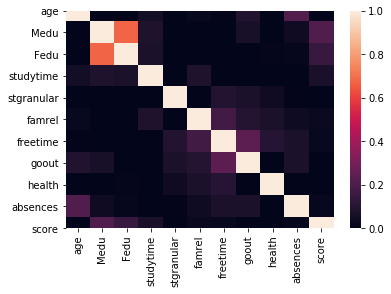

In [28]:
# Визуализируем корреляции для числовых признаков
sns.heatmap(stud.corr(), vmin=0, vmax=1)

Чем светлее окраска, тем болшее влияние оказывают факторы на score. Это Medu, Fedu особенно. Остальные признаки имеют незначительное влияние.

Работа с номинативными признаками

In [29]:
# Смотрим различаются ли распределения рейтинга в зависимости от значения этих переменных?
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

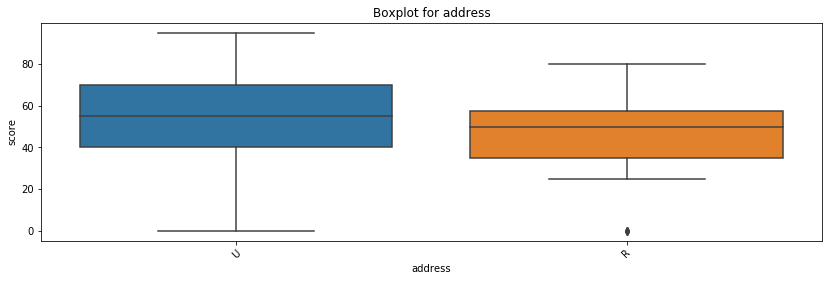

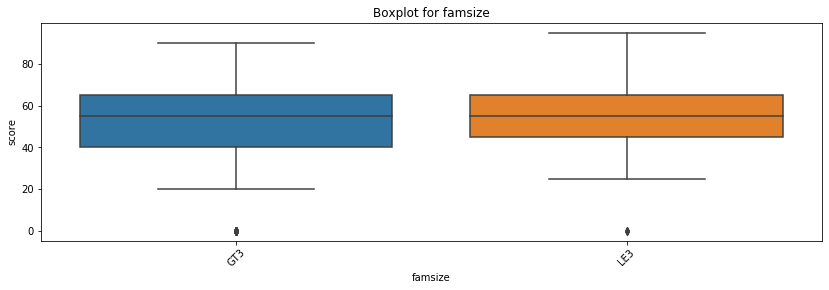

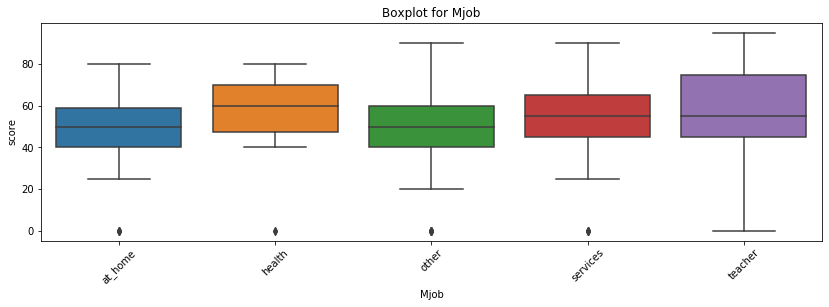

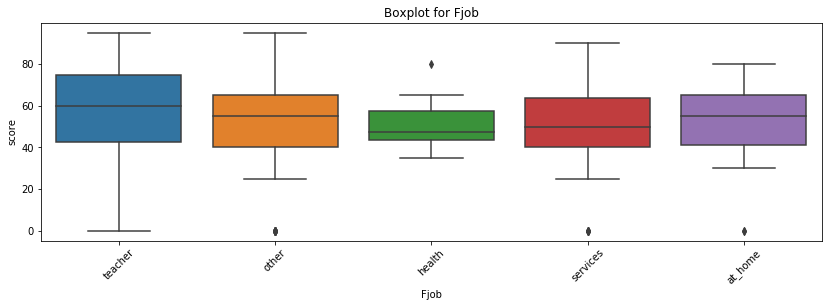

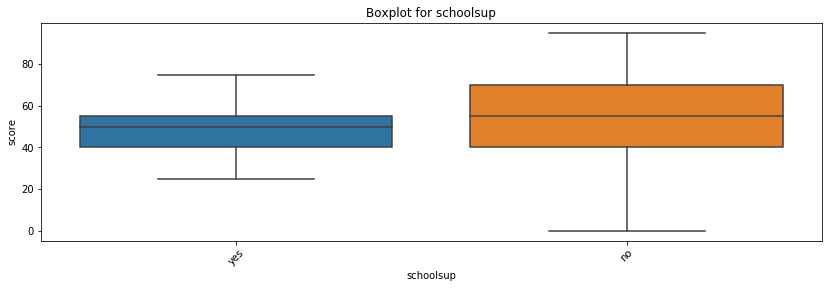

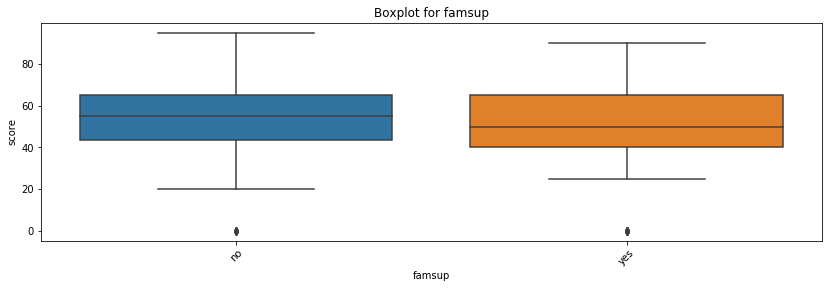

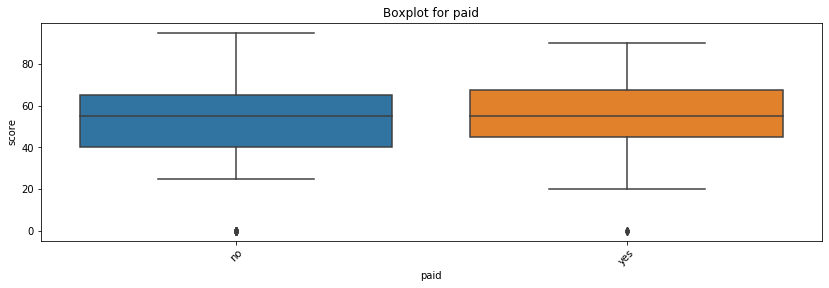

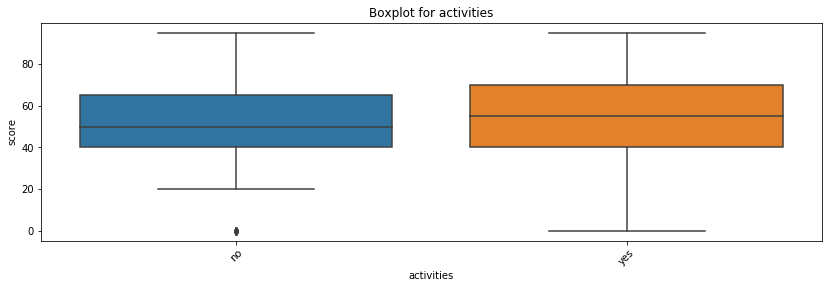

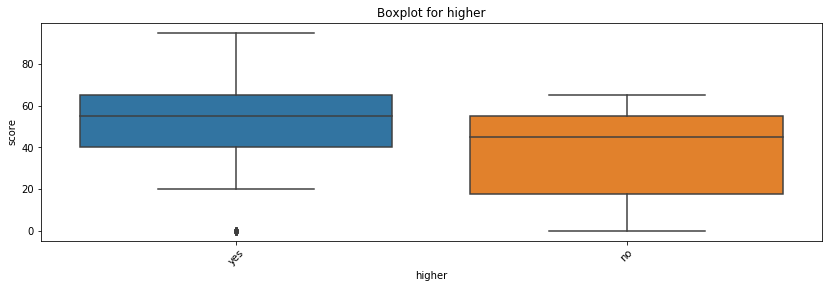

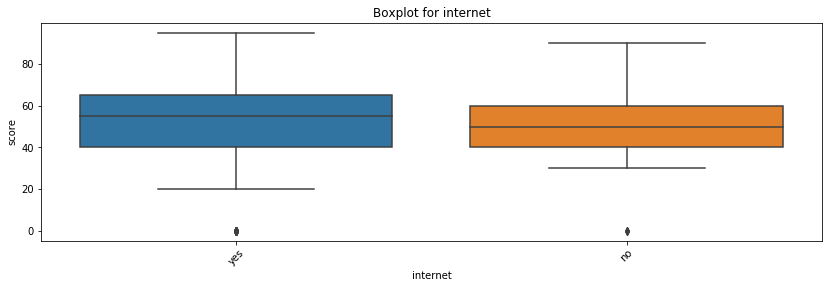

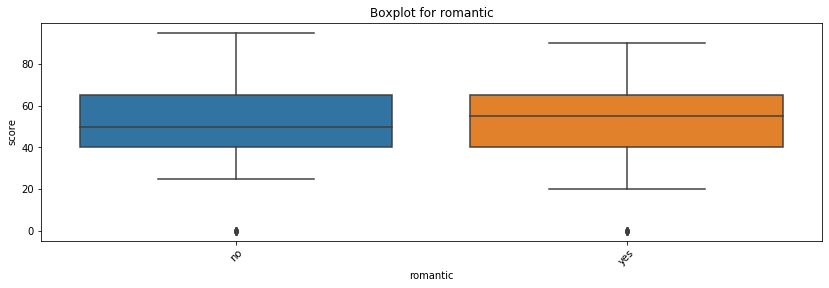

In [30]:
for col in ['address', 'famsize', 'Mjob', 'Fjob', 'schoolsup','famsup','paid','activities','higher','internet','romantic']:
    get_boxplot(col)

Графики показывают, что есть влияние факторов higher,schoolsup,address,Mjob,Fjob,internet.

In [31]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [32]:
for col in ['address', 'famsize', 'Mjob', 'Fjob', 'schoolsup','famsup','paid','activities','higher','internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher


In [33]:
# Замена NaN на значение 0-ого индекса
stud['address'].fillna(stud['address'].value_counts().index[0],inplace=True)

In [42]:
# Удаление пропущенных значений в столбце address
stud.dropna(subset=['address'])

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,studytime,schoolsup,famsup,paid,activities,stgranular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,4.0,4.0,at_home,teacher,2.0,yes,no,no,no,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,1.0,1.0,at_home,other,2.0,no,yes,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,1.0,1.0,at_home,other,2.0,yes,no,NaN,no,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,4.0,2.0,health,NaN,3.0,no,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,3.0,3.0,other,other,2.0,no,yes,yes,no,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,2.0,2.0,services,services,2.0,no,yes,yes,no,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,3.0,1.0,services,services,1.0,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,1.0,1.0,other,other,1.0,NaN,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,3.0,2.0,services,other,1.0,no,no,no,NaN,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [35]:
# Замена NaN на значение 0-ого индекса
stud['higher'].fillna(stud['higher'].value_counts().index[0],inplace=True)

создаем dummy переменные с помощью str.get_dummies() присоединяем полученный датафрейм с dummy к исходному датафрейму

In [44]:
spisok = [ 'address', 'higher']
for col in spisok:
    test = stud[col].str.get_dummies()
#     stud = pd.concat([stud, test], axis=1)
    

stud.drop

<bound method DataFrame.drop of     school sex  age address famsize  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     NaN   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3   3.0   3.0     other     other   
..     ...  ..  ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3   2.0   2.0  services  services   
391     MS   M   17       U     LE3   3.0   1.0  services  services   
392     MS   M   21       R     GT3   1.0   1.0     other     other   
393     MS   M   18       R     LE3   3.0   2.0  services     other   
394     MS   M   19       U     LE3   1.0   1.0     other   at_home   

     studytime schoolsup famsup paid activities  stgranular higher internet  \
0          2.0       yes     no   no

In [45]:
stud.tail()

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,studytime,schoolsup,famsup,paid,activities,stgranular,higher,internet,romantic,famrel,freetime,goout,health,absences,score,R,U,no,yes
390,MS,M,20,U,LE3,2.0,2.0,services,services,2.0,no,yes,yes,no,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0,0,1,0,1
391,MS,M,17,U,LE3,3.0,1.0,services,services,1.0,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0,0,1,0,1
392,MS,M,21,R,GT3,1.0,1.0,other,other,1.0,NaN,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0,1,0,0,1
393,MS,M,18,R,LE3,3.0,2.0,services,other,1.0,no,no,no,NaN,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0,1,0,0,1
394,MS,M,19,U,LE3,1.0,1.0,other,at_home,1.0,NaN,no,no,no,-3.0,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0,0,1,0,1


In [46]:
# Переименуем столбец
stud.rename(columns={'U': 'urban'}, inplace=True)

In [47]:
# Переименуем столбец
stud.rename(columns={'R': 'suburban'}, inplace=True)

In [48]:
# Переименуем столбец
stud.rename(columns={'yes': 'yhigher'}, inplace=True)

In [51]:
# Переименуем столбец
stud.rename(columns={'no': 'nhigher'}, inplace=True)

In [50]:
# Удаляем столбцы
stud.drop(['school','sex','address','famsize','Mjob','Fjob','schoolsup','famsup','paid','activities','internet','higher','romantic'],axis=1)

,age,Medu,Fedu,studytime,stgranular,famrel,freetime,goout,health,absences,score,suburban,urban,nhigher,yhigher
0,18,4.0,4.0,2.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0,0,1,0,1
1,17,1.0,1.0,2.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0,0,1,0,1
2,15,1.0,1.0,2.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0,0,1,0,1
3,15,4.0,2.0,3.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0,0,1,0,1
4,16,3.0,3.0,2.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0,0,1,0,1
391,17,3.0,1.0,1.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0,0,1,0,1
392,21,1.0,1.0,1.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0,1,0,0,1
393,18,3.0,2.0,1.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0,1,0,0,1


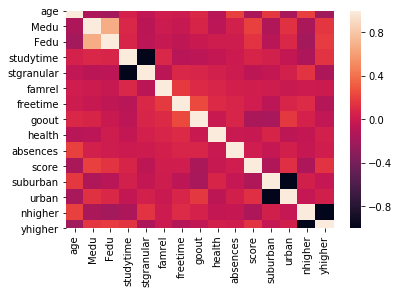

In [52]:
# Финально визуализируем корреляции
sns.heatmap(stud.corr())

ВЫВОДЫ

Наиболее значимые номинативные признаки приведены к числовому формату и совмещены с числовыми. 
На основании визуализации можно сделать выводы, что ключевыми влияющими на score факторами являются: 

urban и sububan (тип адреса ученика городской или загородный),
Medu и Fedu (образование матери и отца),
yhigher и nhigher (стремление или нестремление получить высшее образование),
studytime и stgranular (время на учёбу помимо школы и отсутствие времени на учёбу),

Остальные признаки из финальной визуализации я бы тоже оставила для модели, чтобы модель стала многофакторной.

